In [10]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import numpy as np

In [96]:
qubit_pool = range(14, 21, 2)
depth_pool = [1]
seed_pool = range(50)
optimizer = "bobyqa"
budget = 10000

n=14 [-1.30926355  1.05929466]
n=16 [-1.24650755  1.05471704]
n=18 [-1.22769713  1.05302463]
n=20 [-1.1311616   1.06120211]


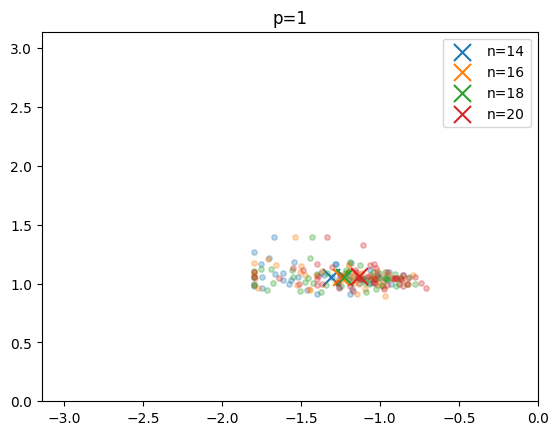

In [97]:
for p in depth_pool:
    plt.figure()
    plt.title(f"{p=}")
    plt.xlim(-np.pi, 0)
    plt.ylim(0, np.pi)
    for n, c in zip(qubit_pool, mcolors.TABLEAU_COLORS.keys()):
        opt_params = []
        for seed in seed_pool:
            filename = f"data/traces/{optimizer}/{n}_{seed}_p{p}_{optimizer.lower()}_{budget}eval_Noneshot.pickle"
            data = pickle.load(open(filename, 'rb'))
            opt_param = data["opt_params"]
            # if data["rescale_ar"] > 0.7:
            # if opt_param[1] < 1.3 and opt_param[1] > 0.9 and opt_param[0] < -0.6 and opt_param[0] > -2.5:
            opt_params.append(opt_param)
        concensus = np.mean(opt_params, axis=0)
        print(f"{n=}", concensus)
        plt.scatter(*concensus, marker="x", c=c, s=150, label=f"{n=}")
        opt_params = np.array(opt_params).T
        plt.scatter(*opt_params, alpha=0.3, c=c, s=15)
    plt.legend()
    